# **Tarea 3: Estadística descriptiva, Pandas y Spark**

## Alumno: José de Jesús Hernández Higuera

### Matrícula: 224470489

## **Proyecto hecho con Pandas**

### Preprocesamiento de datos

Como primer paso, es necesario cargar nuestros datos, los cuales, como se muestra abajo, ya están en la carpeta donde se desarrolla este proyecto. Dado que estos se encuentran en un archivo de Excel llamado 'capturas_2015-2020.xlsx', y que dicho archivo contiene 7 hojas, será conveniente almacenar cada hoja como un archivo csv y, posteriormente, crear DataFrames. De esta forma, los 6 años que están por analizarse se distribuirán en las variables, las cuales no son más que los DataFrames mencionados anteriormente.

In [1]:
ls

 2015.csv             2017.csv   2020.csv                  Tarea_3.ipynb
 2016.csv             2018.csv   capturas_2015-2020.xlsx   work/
'2016 programa.csv'   2019.csv   spark-warehouse/


In [2]:
import pandas as pd

#Importemos cada hoja del Excel como un DataFrame independiente
cap_2015P = pd.read_csv('2015.csv')
cap_2016P = pd.read_csv('2016.csv')
cap_programa = pd.read_csv('2016 programa.csv')
cap_2017P = pd.read_csv('2017.csv')
cap_2018P = pd.read_csv('2018.csv')
cap_2019P = pd.read_csv('2019.csv')
cap_2020P = pd.read_csv('2020.csv')

Es conveniente que, antes de comenzar el análisis, veamos la información de cada uno de los DataFrames para saber si existen valores nulos, el tipo de los valores, los nombres de las columnas, entre otras cosas.

In [3]:
capturas = [cap_2015P, cap_2016P, cap_2017P, cap_2018P, cap_2019P, cap_2020P]

for i in capturas:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421360 entries, 0 to 421359
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Fecha                  384663 non-null  object 
 1   Latitud                384663 non-null  float64
 2   Longitud               384663 non-null  float64
 3   Ubicacion              384663 non-null  object 
 4   Municipio              384663 non-null  object 
 5   Comunidad              384663 non-null  object 
 6   Productor              384663 non-null  object 
 7   Cultivo                384663 non-null  object 
 8   Fenologia              384663 non-null  object 
 9   Superficie_ha          384663 non-null  float64
 10  No_Trampas_Instaladas  384663 non-null  float64
 11  No_Trampas_Revisadas   384663 non-null  float64
 12  No_DiaphorinasXtrampa  384663 non-null  float64
 13  Mes                    384663 non-null  float64
 14  Semana                 384663 non-nu

Con base en la información brindada en la celda anterior, a continuación se harán algunos arreglos para hacer más sencillo el análisis. El objetivo principal será hacer que los nombres de las columnas más importantes coincidan, de esa forma, será más fácil hacer, por ejemplo, ciclos 'for'. Las modificaciones serán las siguientes

In [4]:
#Juntemos los dos DataFrames que corresponden al 2016
cap_2016P = pd.concat([cap_2016P, cap_programa], ignore_index=True)
cap_2016P['Fecha'] = pd.to_datetime(cap_2016P['Fecha'], dayfirst=True)
cap_2016P['Mes'] = cap_2016P['Fecha'].dt.to_period('M')

In [5]:
#Reemplacemos los nombres de las columnas necesarias para que los DataFrames sean lo m[as parecidos posibles
cap_2018P.rename(columns={'fecha':'Fecha', 'captura':'No_DiaphorinasXtrampa', 'latitud':'Latitud', 'longitud':'Longitud'}, inplace=True)
cap_2019P.rename(columns={'DiaphorinaXTrampa':'No_DiaphorinasXtrampa'}, inplace=True)
cap_2020P.rename(columns={'DiaphorinaXTrampa':'No_DiaphorinasXtrampa'}, inplace=True)

#Hagamos que el DataFrame de 2019 y 2020 tenga formato de fecha para la columna homonima
cap_2019P['Fecha'] = pd.to_datetime(cap_2019P['Fecha'], format='%d/%m/%Y')
cap_2020P['Fecha'] = pd.to_datetime(cap_2020P['Fecha'], format='%d/%m/%Y')

#Queremos que todas las columnas con el nombre 'Mes' tengan el formato deseado
for captura in capturas:
    captura['Fecha'] = pd.to_datetime(captura['Fecha'], dayfirst=True)
    captura['Mes'] = captura['Fecha'].dt.to_period('M')

#Buscamos agregar una columna de trampas revisadas al DataFrame del 2018
NTR = []
for x in cap_2018P['Revisada'] :
    if x == 'Si':
        NTR.append(1)
    else:
        NTR.append(0)

cap_2018P['No_Trampas_Revisadas'] = NTR

### 1) Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017 y 2020. Es decir una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.

*Notemos que el DataFrame correspondiente al 2016 contiene datos del 2015.*

In [8]:
cap_2016P[cap_2016P['Fecha']=='2015']['Fecha']

438825   2015-01-01
438948   2015-01-01
438952   2015-01-01
438958   2015-01-01
438961   2015-01-01
            ...    
475307   2015-01-01
475309   2015-01-01
475310   2015-01-01
475311   2015-01-01
475313   2015-01-01
Name: Fecha, Length: 1523, dtype: datetime64[ns]

*Aislemos esos datos que no corresponden al año indicado. Luego, añadamos dichos datos al DataFrame de 2015.*

In [9]:
#Aislamiento de los datos 
sub_2015 = cap_2016P[cap_2016P['Mes'] == '2015-01']

#Nuevo DataFrame del 2015
new_cap_2015P = pd.concat([cap_2015P, sub_2015], ignore_index=True)
new_cap_2015P.head()

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,No_Trampas_Instaladas,No_Trampas_Revisadas,No_DiaphorinasXtrampa,Mes,Semana
0,2015-01-22,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,0.0,1.0,0.0,2015-01,4.0
1,2015-01-29,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,1.0,1.0,0.0,2015-01,5.0
2,2015-01-29,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,2015-01,5.0
3,2015-01-22,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,0.0,1.0,0.0,2015-01,4.0
4,2015-01-29,24.11726,-99.03528,177_THUE05-28-030-0415T03,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,2015-01,5.0


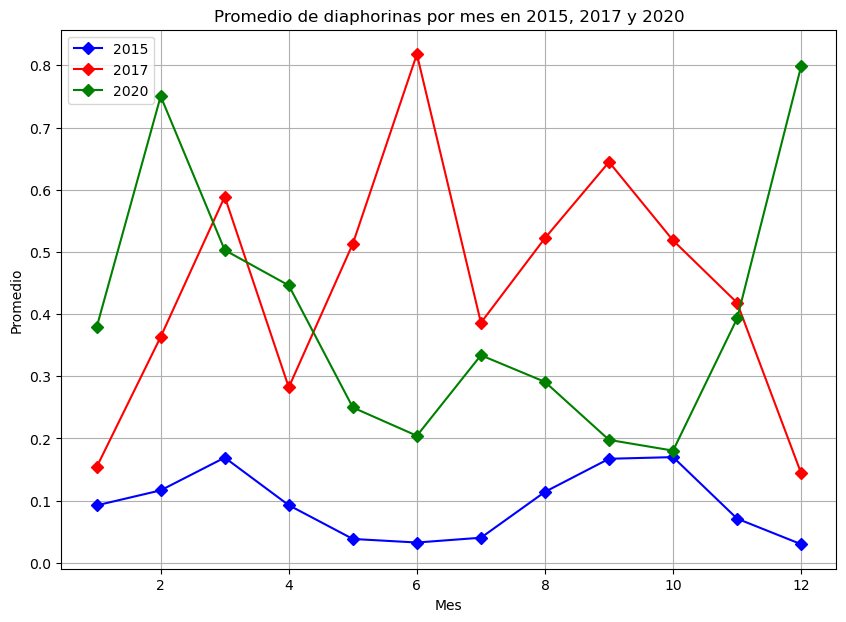

In [10]:
import matplotlib.pyplot as plt

#Agrupemos los datos por mes y obtengamos el promedio de diaphorinas para cada uno en el año correspondiente
pr_men_2015 = cap_2015P.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
pr_men_2017 = cap_2017P.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
pr_men_2020 = cap_2020P.groupby('Mes')['No_DiaphorinasXtrampa'].mean()

#Creamos los detalles de nuestra gráfica
plt.figure(figsize=(10,7))
plt.plot(range(1,13), pr_men_2015, marker='D', label='2015', color='blue')
plt.plot(range(1,13), pr_men_2017, marker='D', label='2017', color='red')
plt.plot(range(1,13), pr_men_2020, marker='D', label='2020', color='green')
plt.title('Promedio de diaphorinas por mes en 2015, 2017 y 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.grid()
plt.legend()
plt.show()

### 2) Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020, pero sólo de un municipio.

In [155]:
#Primero conozcamos qué municipios fueron tomados en cuenta en 2020
cap_2020P['Municipio'].value_counts()

Municipio
GUEMEZ      39221
PADILLA     25610
LLERA       17253
HIDALGO     11895
VICTORIA     9071
Name: count, dtype: int64

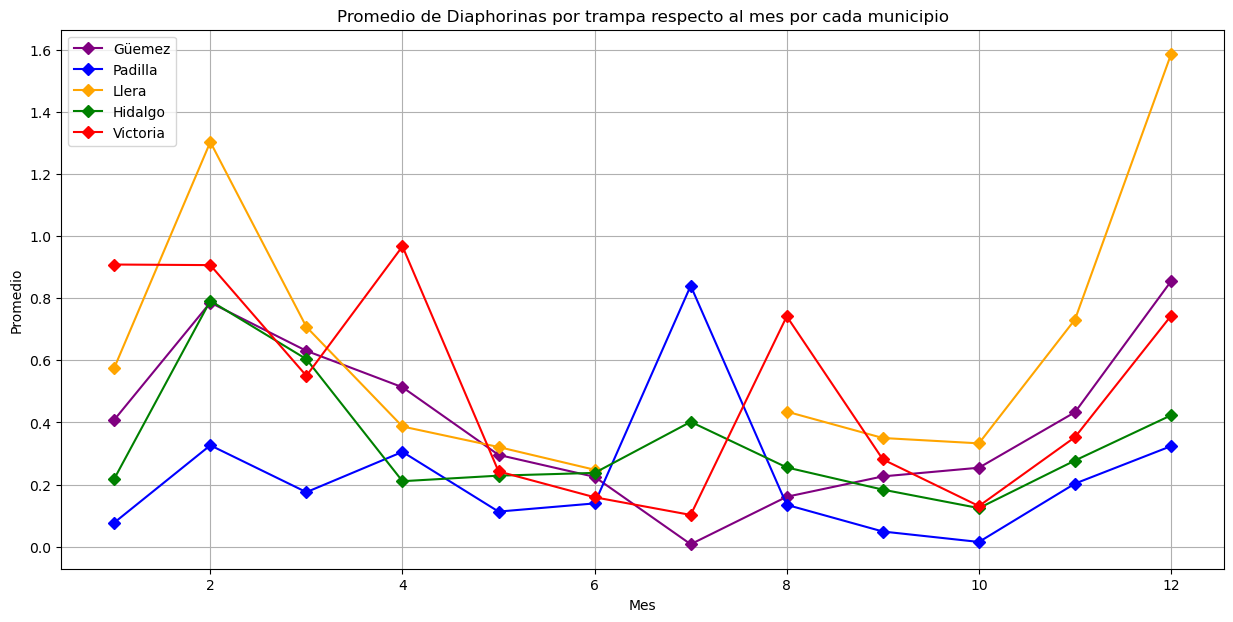

In [14]:
#Hagamos un filtrado para separar los datos de cada municipio
gue_df = cap_2020P[cap_2020P['Municipio']=='GUEMEZ']
pad_df = cap_2020P[cap_2020P['Municipio']=='PADILLA']
lle_df = cap_2020P[cap_2020P['Municipio']=='LLERA']
hid_df = cap_2020P[cap_2020P['Municipio']=='HIDALGO']
vic_df = cap_2020P[cap_2020P['Municipio']=='VICTORIA']

#De manera similar al proceso anterior, buscamos agrupar por mes y obtener el promedio
p_gue_df = gue_df.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
p_pad_df = pad_df.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
p_lle_df = lle_df.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
p_hid_df = hid_df.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
p_vic_df = vic_df.groupby('Mes')['No_DiaphorinasXtrampa'].mean()

plt.figure(figsize=(15,7))
plt.title('Promedio de Diaphorinas por trampa respecto al mes por cada municipio')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.plot(range(1,13), p_gue_df, color='purple', marker='D', label='Güemez')
plt.plot(range(1,13), p_pad_df, color='blue', marker='D', label='Padilla')
plt.plot(range(1,13), p_lle_df, color='orange', marker='D', label='Llera')
plt.plot(range(1,13), p_hid_df, color='green', marker='D', label='Hidalgo')
plt.plot(range(1,13), p_vic_df, color='red', marker='D', label='Victoria')
plt.legend()
plt.grid()
plt.show()

### 3) Hacer una tabla donde la primera columna sea el mes, la segunda el índice Id (por trampa) y la tercera el índice Cx para el año 2015

*Ahora podemos proceder con la tabla que necesitamos en este apartado utilizando el nuevo DataFrame.*

In [15]:
#Obtengamos los valores para hacer la tabla. Primero tendremos las siguientes listas vacías
Id = []
C_x = []

#Creemos un rango de todos los meses para poder hacer un ciclo for
rango_meses = pd.date_range(start='2015-01', end='2015-12', freq='MS').strftime('%Y-%m')

#Ahora, para cada mes sacaremos la media, la varianza muestral y la suma de los datos y así poder contstruir los índices requeridos
for j in rango_meses:
    x_bar = new_cap_2015P[new_cap_2015P['Mes']==j]['No_DiaphorinasXtrampa'].mean()          #media muestral
    sigma2 = new_cap_2015P[new_cap_2015P['Mes']==j]['No_DiaphorinasXtrampa'].var(ddof=1)    #varianza muestral
    sum_x = new_cap_2015P[new_cap_2015P['Mes']==j]['No_DiaphorinasXtrampa'].sum()           #suma de los datos
    id = sigma2/x_bar   #índice de dispersión
    
    Id.append(id)
    C_x.append((id - 1)/(sum_x - 1))        #índice de Green calculado y agregado a la lista


In [16]:
#Realicemos la tabla
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

ind_2015 = pd.DataFrame({'Mes': meses, 'Índice de dispersión': Id, 'Coeficiente de Green': C_x})
ind_2015

,Mes,Índice de dispersión,Coeficiente de Green
0,Enero,2.551216,0.001092
1,Febrero,3.399692,0.000660
2,Marzo,4.471312,0.000591
3,Abril,2.734911,0.000546
4,Mayo,2.369142,0.001103
5,Junio,5.223050,0.003724
6,Julio,3.850390,0.002000
7,Agosto,5.274106,0.001133
8,Septiembre,8.174094,0.001236
9,Octubre,8.883013,0.001394


### 4) Hacer una gráfica del índice Id (por trampa) como función del mes que abarque desde 2015 hasta 2020

*Como se dijo anteriormente, el DataFrame del 2016 contiene algunos datos del 2015. De modo que, antes de proceder con la indicación del ejercicio, primero es necesario corregir esto. Para lograrlo, uniremos los DataFrames del 2015 y 2016. Posteriormente, el agrupamiento por mes hará que podamos distinguir entre los meses de un año y del otro.*

In [162]:
cap_15_16 = pd.concat([cap_2015P, cap_2016P], ignore_index=True)

*Definamos un par de listas nuevas: una para las capturas y una sin elementos para los índices. Adicionalmente, definiremos el rango de meses desde el 2015 al 2020.*

In [205]:
#Lista nueva de DataFrames
capturas2 = [cap_15_16, cap_2017P, cap_2018P, cap_2019P, cap_2020P]

#Lista vacía para los índices
Id_mes_global = []

#Rango de los meses de 2015 a 2020
rango_meses_total = pd.date_range(start='2015-01', end='2020-12', freq='MS').strftime('%Y-%m')

In [192]:
cap_15_16['Mes'] = cap_15_16['Fecha'].dt.to_period('M')

*Ahora, realicemos el cálculo de la varianza y la media muestrales, lo cual, hará que, posteriormente, nos sea posible obtener el índice Id.*

In [206]:
for k in capturas2:
    x_mean = k.groupby('Mes')['No_DiaphorinasXtrampa'].mean()
    var = k.groupby('Mes')['No_DiaphorinasXtrampa'].var(ddof=1)
    id_glob = var/x_mean
    for l in id_glob:
        Id_mes_global.append(l)


*Finalmente, realicemos la gráfica requerida.*

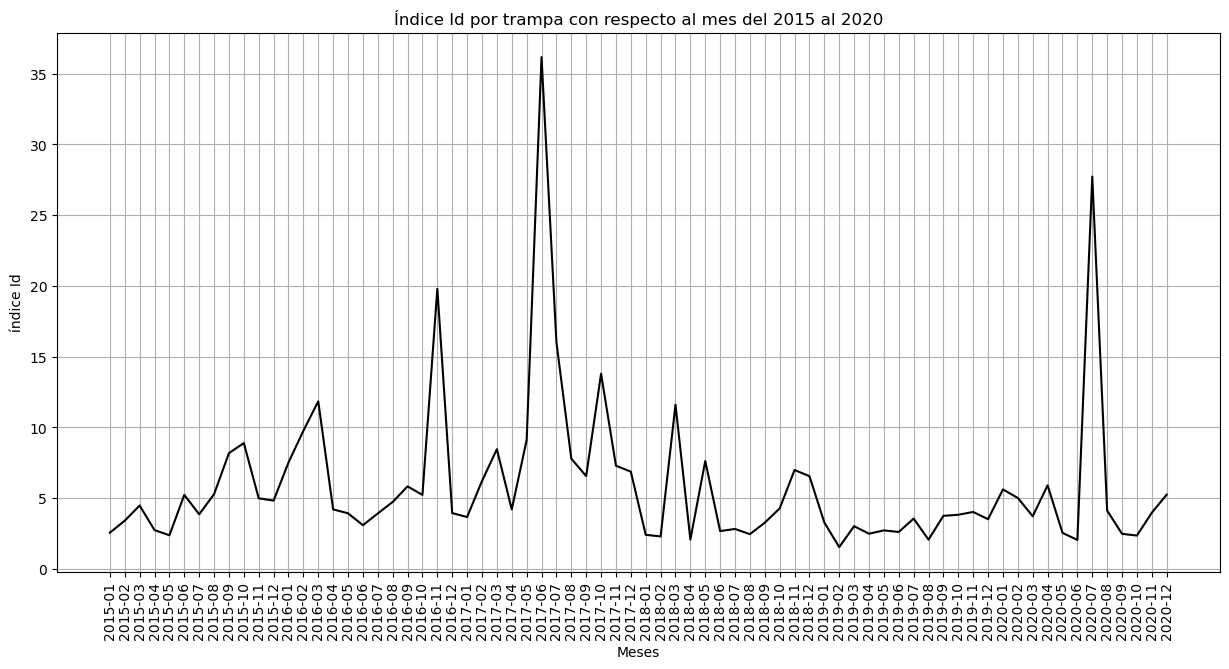

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(rango_meses_total, Id_mes_global, color='black')
plt.title("Índice Id por trampa con respecto al mes del 2015 al 2020")
plt.xlabel("Meses")
plt.xticks(rotation=90)
plt.ylabel("índice Id")
plt.grid()
plt.show()

### 5) Hacer una gráfica del centro de masa de las diaphorinas como función del mes que abarque de 2017 a 2020.  Nota: CM=pos*Diaph/Ntrampas, donde CM se refiere al centro de masa, pos es la posición de la trampa, Diaph es el promedio de diaphorinas en la trampa y Ntrampas es el número de trampas que se consideran en el cálculo.

In [17]:
datos = [cap_2018P, cap_2019P, cap_2020P]

In [18]:
CM_data = cap_2017P.groupby('Mes')[['No_DiaphorinasXtrampa', 'Latitud', 'Longitud']].mean()
CM_data['Ntrampas'] = cap_2017P.groupby('Mes')['No_Trampas_Revisadas'].count()

for df in datos:
    data = df.groupby('Mes')[['No_DiaphorinasXtrampa', 'Latitud', 'Longitud']].mean()
    data['Ntrampas'] = df.groupby('Mes')['Fecha'].count()
    CM_data = pd.concat([CM_data, data], ignore_index=True)

In [21]:
import numpy as np

CM_lat = (CM_data['Latitud'] * CM_data['No_DiaphorinasXtrampa']) / CM_data['Ntrampas']
Cm_lon = (CM_data['Longitud'] * CM_data['No_DiaphorinasXtrampa']) / CM_data['Ntrampas']

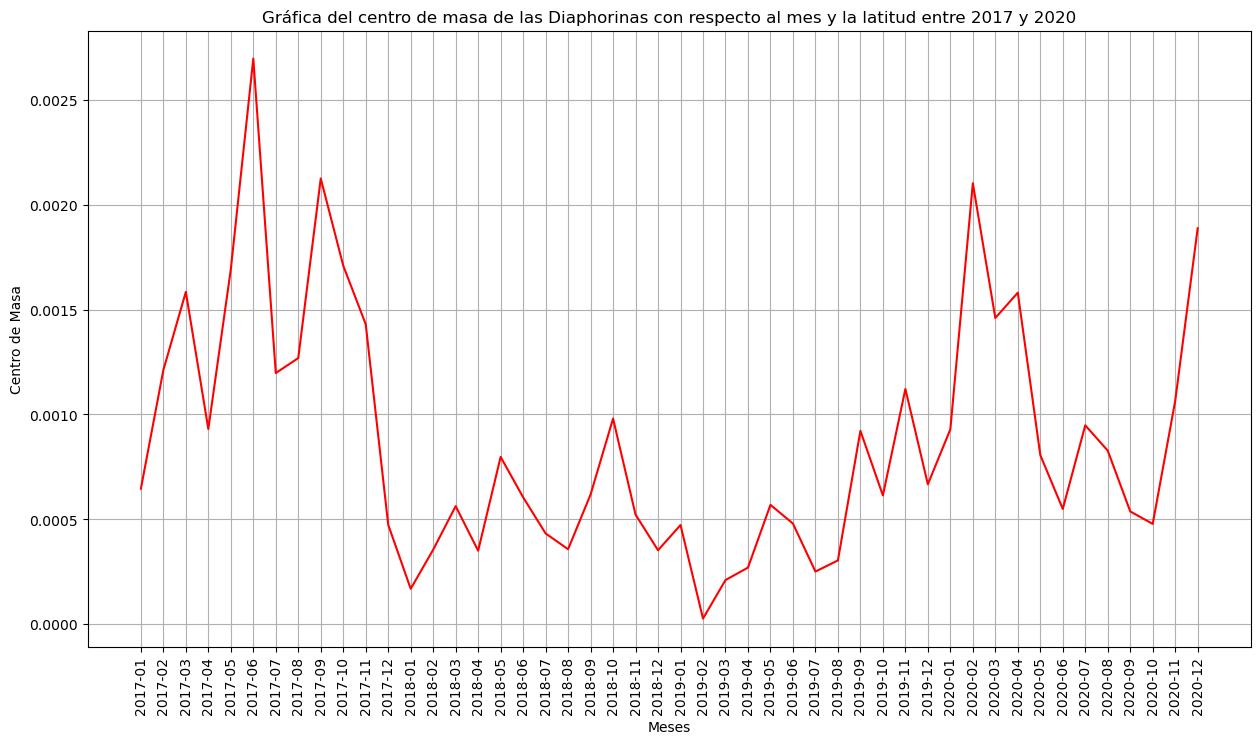

In [23]:
import matplotlib.pyplot as plt
periodo = pd.date_range(start='2017-01', end='2020-12', freq='MS').strftime('%Y-%m')

plt.figure(figsize=(15,8))
plt.plot(periodo, CM_lat, color='red')
plt.title("Gráfica del centro de masa de las Diaphorinas con respecto al mes y la latitud entre 2017 y 2020")
plt.xlabel("Meses")
plt.xticks(rotation=90)
plt.ylabel("Centro de Masa")
plt.grid()
plt.show()

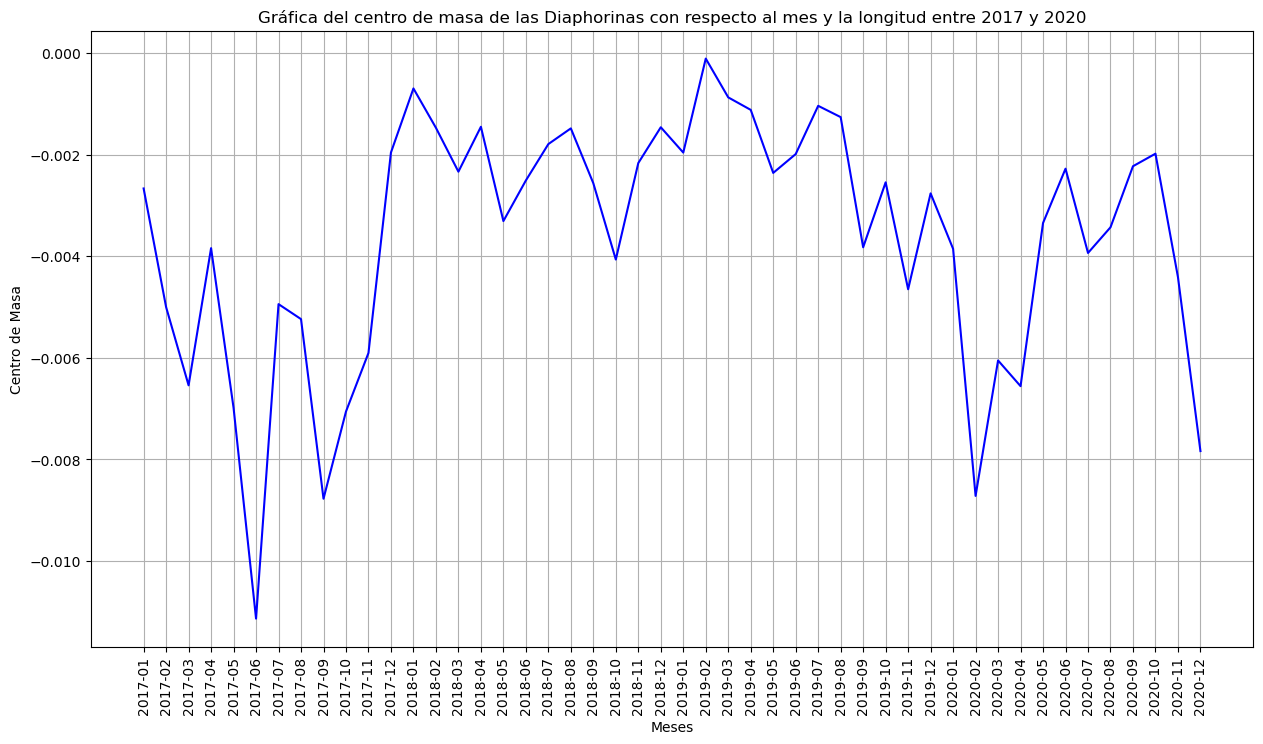

In [25]:
plt.figure(figsize=(15,8))
plt.plot(periodo, Cm_lon, color='blue')
plt.title("Gráfica del centro de masa de las Diaphorinas con respecto al mes y la longitud entre 2017 y 2020")
plt.xlabel("Meses")
plt.xticks(rotation=90)
plt.ylabel("Centro de Masa")
plt.grid()
plt.show()